In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## 1. Open and display the image “dog.jpeg”. Convert the image in to numpy array, so that i can be used in further processing

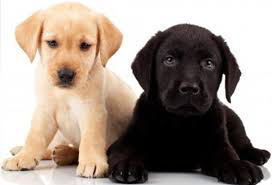

In [2]:
img = Image.open('dogs.jpeg')
img

In [31]:
arraydata = np.asarray(img)

In [32]:
print(arraydata.shape)

(185, 272, 3)


In [33]:
print(arraydata[0:2])

[[[240 240 240]
  [255 255 255]
  [255 255 255]
  ...
  [254 254 254]
  [254 254 254]
  [254 254 254]]

 [[240 240 240]
  [255 255 255]
  [255 255 255]
  ...
  [254 254 254]
  [254 254 254]
  [254 254 254]]]


## 2. Find out the dimensions of the image and convert it in to a two-dimensional array

In [34]:
print("Dimensions of the Image")
print("Size of the image : ", img.size)
print("Height : ", img.height)
print("Width : " , img.width)

Dimensions of the Image
Size of the image :  (272, 185)
Height :  185
Width :  272


In [35]:
DD_array = arraydata.ravel()
new_array = DD_array.reshape(arraydata.shape[0] * arraydata.shape[1], arraydata.shape[2])

In [36]:
new_array.shape

(50320, 3)

## 3. Use kmeans clustering with k set to 3 and cluster the image

In [12]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)

In [13]:
kmeans.fit(new_array)

KMeans(n_clusters=3)

In [14]:
print("Cluster's Center")
print(kmeans.cluster_centers_)

Cluster's Center
[[ 29.50970635  21.57953738  20.47312298]
 [251.4747266  247.66330696 243.12997027]
 [210.61197703 174.79589828 143.66981132]]


In [15]:
print("Elements of Each cluster ")
unique, counts = np.unique(kmeans.labels_, return_counts=True)
print(dict(zip(unique, counts)))

Elements of Each cluster 
{0: 18291, 1: 19814, 2: 12215}


## 4. Predict the cluster label of every pixel in the image and plot it back as an image.

In [16]:
data = pd.DataFrame(new_array, columns=["Test1", "Test2", "Test3"])
data["cluster"] = kmeans.labels_

In [17]:
data.head()

,Test1,Test2,Test3,cluster
0,240,240,240,1
1,255,255,255,1
2,255,255,255,1
3,251,251,251,1
4,255,255,255,1


C:\Users\dhira\anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


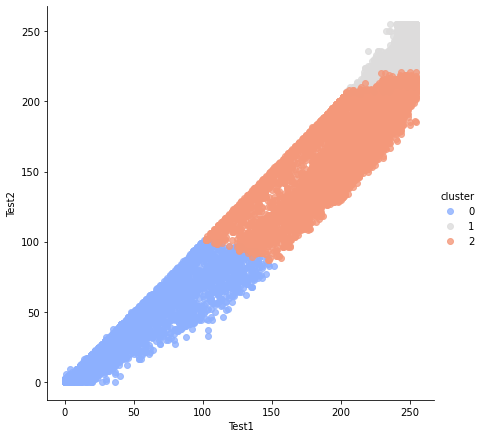

In [22]:
sns.lmplot('Test1', 'Test2', data=data, hue="cluster",
           palette='coolwarm', size=6, aspect=1, fit_reg=False);

In [43]:
X_compressed = kmeans.cluster_centers_[kmeans.labels_]
X_compressed = np.clip(X_compressed.astype('uint8'), 0, 255)

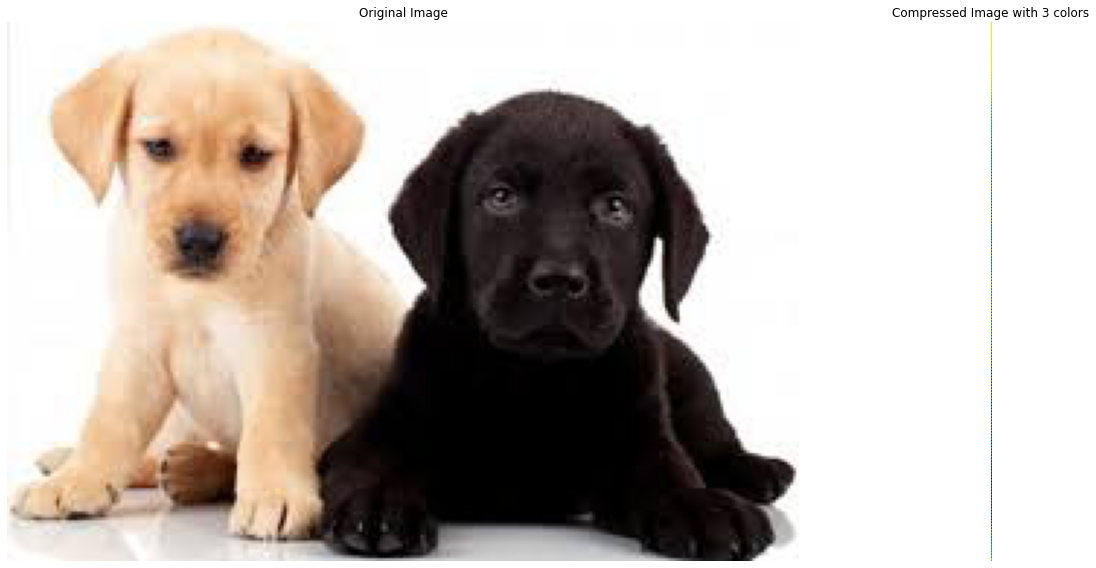

In [44]:
fig, ax = plt.subplots(1, 2, figsize=(20, 8))
ax[0].imshow(img)
ax[0].set_title('Original Image')
ax[1].imshow(X_compressed)
ax[1].set_title('Compressed Image with 3 colors')
for ax in fig.axes:
    ax.axis('off')
plt.tight_layout()

## 5. Find out the three dominant color in the image

In [45]:
def rgb_to_hex(rgb):
    return '#%02x%02x%02x' % (int(rgb[0]), int(rgb[1]), int(rgb[2]))

In [46]:
centroid_colors = kmeans.cluster_centers_.astype(int)
colours = [rgb_to_hex(color) for color in centroid_colors]

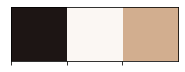

In [47]:
sns.palplot(colours)
plt.show()